In [162]:
import pandas as pd
import numpy as np

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
df=pd.read_csv("Social_Network_Ads.csv")
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


### Standardization

### Train Test Split

In [165]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop("Purchased",axis=1),df["Purchased"],test_size=0.3,random_state=0)

In [166]:
x_train.shape,x_test.shape

((280, 2), (120, 2))

In [167]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#fit the scalert to train set,it will learn the parameters
scaler.fit(x_train)

#transform train and test sets
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

* understand that while transforming only fit one the train columns and but perform transform on both train and test column

In [168]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [169]:
x_train_scaled # both of these is in numpy we have to convert it into dataframe

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [170]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [171]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


* so basically this is the scaled data

In [172]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [173]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


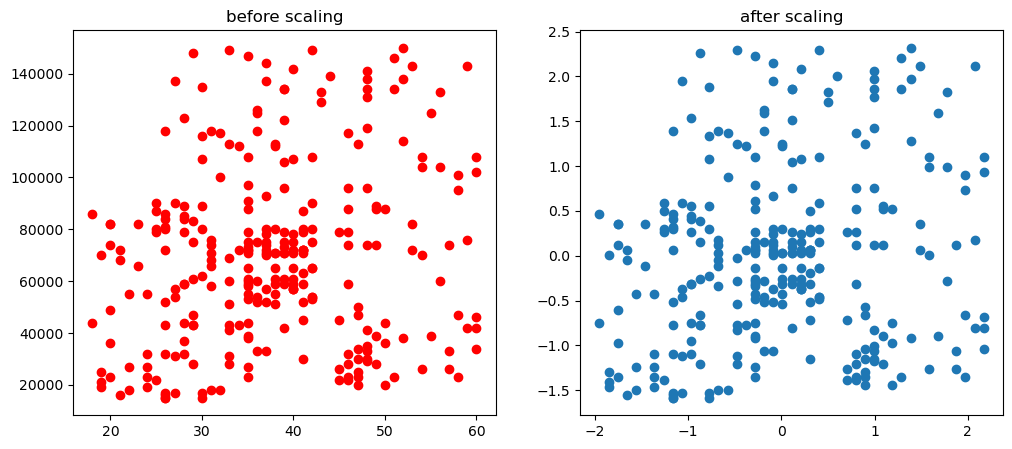

In [174]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train["Age"],x_train["EstimatedSalary"],color="red")
ax1.set_title("before scaling")
ax2.scatter(x_train_scaled["Age"],x_train_scaled["EstimatedSalary"])
ax2.set_title("after scaling")
plt.show()

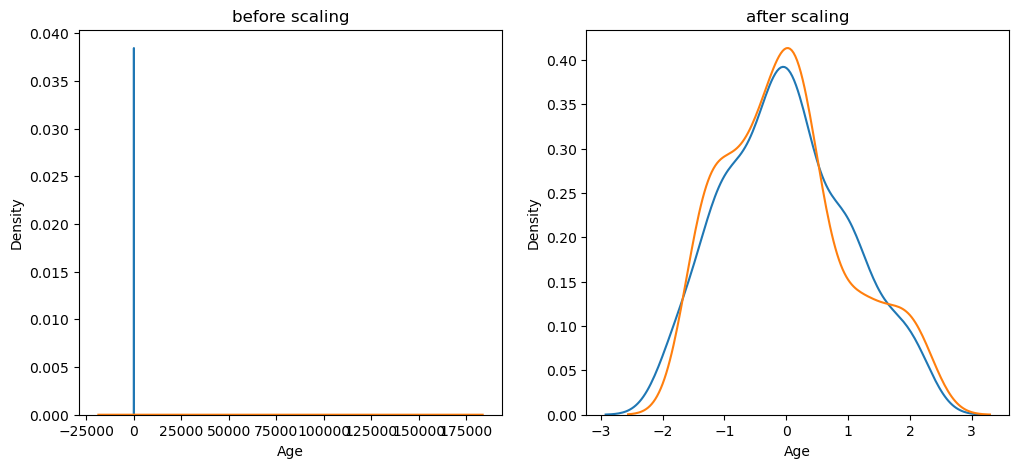

In [175]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("before scaling")
sns.kdeplot(data=x_train,x="Age",ax=ax1)
sns.kdeplot(data=x_train,x="EstimatedSalary",ax=ax1)


ax2.set_title("after scaling")
sns.kdeplot(data=x_train_scaled,x="Age",ax=ax2)
sns.kdeplot(data=x_train_scaled,x="EstimatedSalary",ax=ax2)

plt.show()

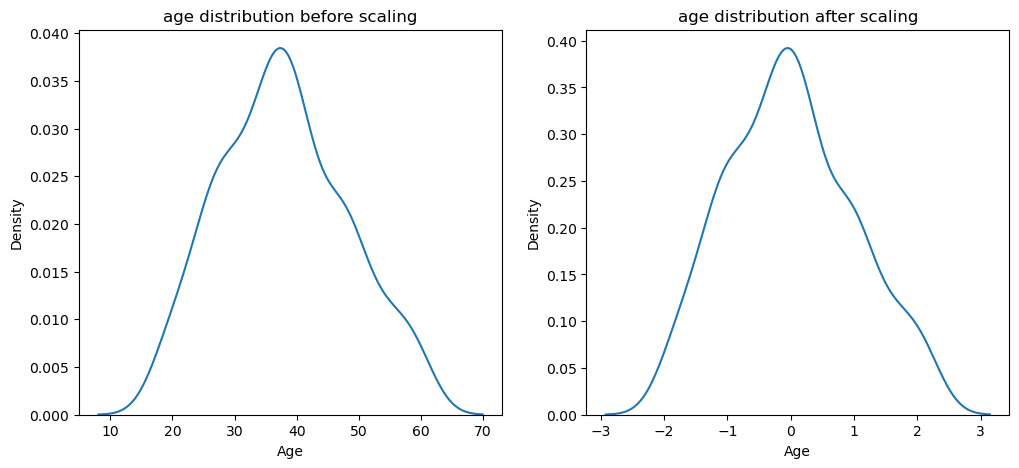

In [176]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("age distribution before scaling")
sns.kdeplot(data=x_train,x="Age",ax=ax1)


ax2.set_title("age distribution after scaling")
sns.kdeplot(data=x_train_scaled,x="Age",ax=ax2)
plt.show()

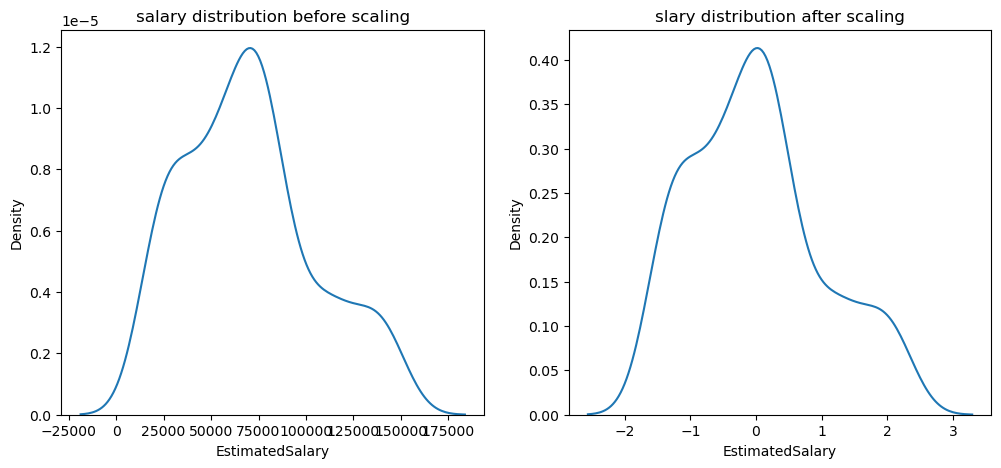

In [177]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("salary distribution before scaling")
sns.kdeplot(data=x_train,x="EstimatedSalary",ax=ax1)


ax2.set_title("slary distribution after scaling")
sns.kdeplot(data=x_train_scaled,x="EstimatedSalary",ax=ax2)

plt.show()

* so basically only scale change distribution before and after scale remain same

### Why Scaling is important

In [178]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lrScaled=LogisticRegression()

In [179]:
lr.fit(x_train,y_train)
lrScaled.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [180]:
y_pred=lr.predict(x_test)
y_scaled_pred=lrScaled.predict(x_test_scaled)

In [181]:
from sklearn.metrics import accuracy_score

In [182]:
print("actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_scaled_pred))

actual 0.875
scaled 0.8666666666666667


* ith thoda ghotala zhala ahe pah jevha aapn scaling karto tevha actual peksha changla score yeto

In [183]:
from sklearn.tree import DecisionTreeClassifier

In [184]:
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [185]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [186]:
y_pred=dt.predict(x_test)
y_scaled_pred=dt_scaled.predict(x_test_scaled)

In [187]:
print("actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_scaled_pred))

actual 0.875
scaled 0.875


### effect of outlier

In [188]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [189]:
df2 = pd.concat([
    df,
    pd.DataFrame({
        "Age": [5, 90, 95],
        "EstimatedSalary": [1000, 250000, 350000],
        "Purchased": [0, 1, 1]
    })
], ignore_index=True)


In [190]:
df2.tail()

,Age,EstimatedSalary,Purchased
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1
402,95,350000,1


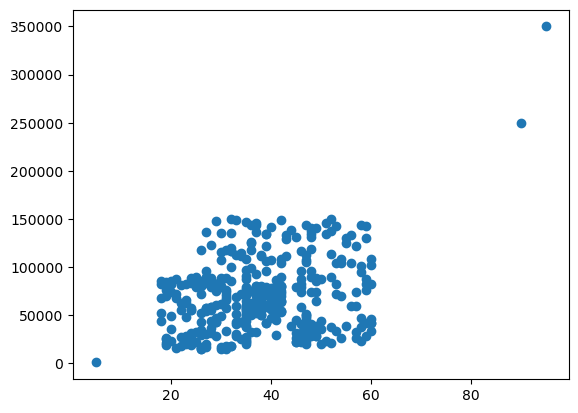

In [191]:
plt.scatter(df2["Age"],df2["EstimatedSalary"])

In [192]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df2[["Age","EstimatedSalary"]],df2["Purchased"],test_size=0.3,random_state=0)

In [193]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

train_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)

In [194]:
train_scaled_df=pd.DataFrame(train_scaled,columns=x_train.columns)
test_scaled_df=pd.DataFrame(test_scaled,columns=x_test.columns)

In [195]:
train_scaled_df

,Age,EstimatedSalary
0,-0.652473,-0.995561
1,1.903047,2.092697
2,-0.104862,1.922701
3,-0.652473,0.562734
4,-0.013593,-0.287245
...,...,...
277,0.899092,-1.108891
278,-0.835010,-0.740567
279,-0.196130,-0.485573
280,-1.017547,-0.428908


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

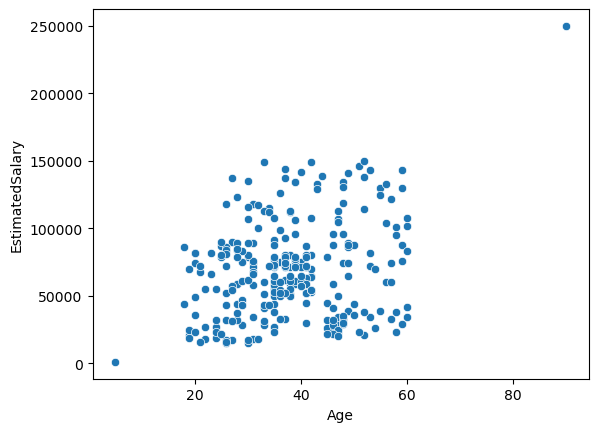

In [196]:
sns.scatterplot(data=x_train,x="Age",y="EstimatedSalary")
#before scaling

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

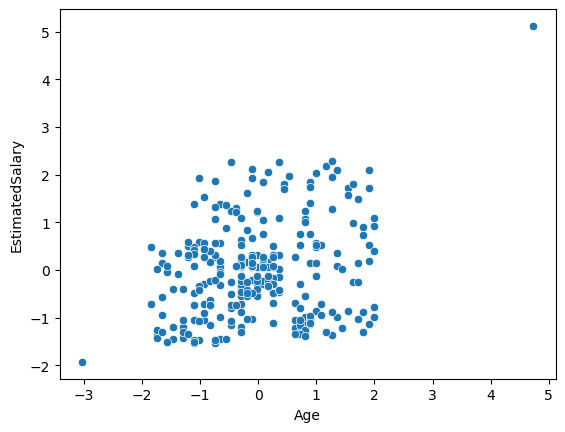

In [197]:
sns.scatterplot(data=train_scaled_df,x="Age",y="EstimatedSalary")
#after scaling

### Normalization

In [205]:
df=pd.read_csv("wine_data.csv",header=None,usecols=[0,1,2])
df.columns=["Class Label","Alcohol","Malic Acid"]

In [206]:
df

,Class Label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

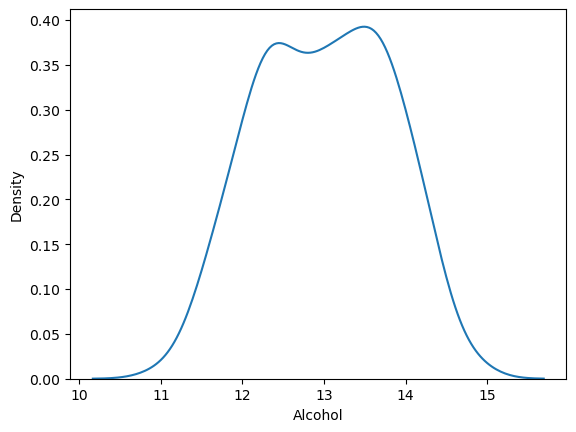

In [207]:
sns.kdeplot(df["Alcohol"])

<Axes: xlabel='Malic Acid', ylabel='Density'>

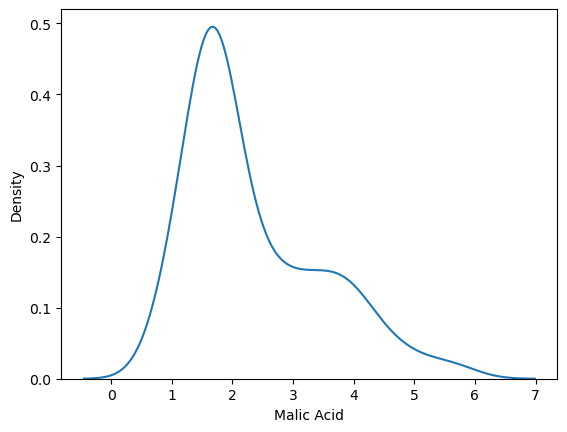

In [208]:
sns.kdeplot(df["Malic Acid"])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

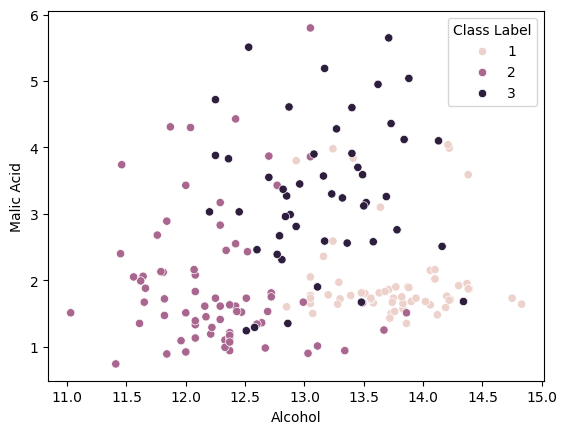

In [209]:
sns.scatterplot(data=df,x="Alcohol",y="Malic Acid",hue="Class Label")

In [213]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[["Alcohol","Malic Acid"]],df["Class Label"],test_size=0.3,random_state=0)

In [218]:
x_train.shape,x_test.shape

((124, 2), (54, 2))

In [221]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler()
mmscaler.fit(x_train)

x_train_scaled=mmscaler.transform(x_train)
x_test_scaled=mmscaler.transform(x_test)

In [225]:
x_trainscaled_df=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_testscaled_df=pd.DataFrame(x_test_scaled,columns=x_test.columns)

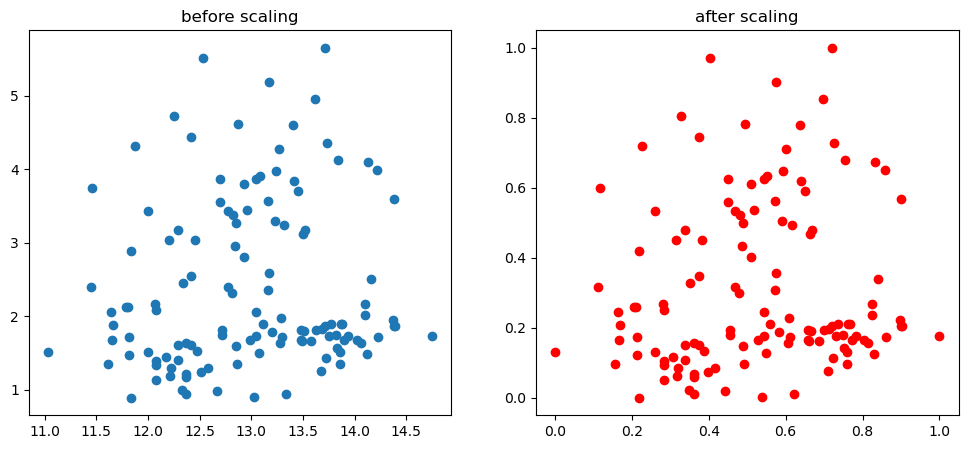

In [236]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("before scaling")
ax1.scatter(x=x_train["Alcohol"],y=x_train["Malic Acid"])

ax2.set_title("after scaling")
ax2.scatter(x=x_trainscaled_df["Alcohol"],y=x_trainscaled_df["Malic Acid"],color="red")

<Axes: title={'center': 'after standard scaling'}, xlabel='Alcohol', ylabel='Density'>

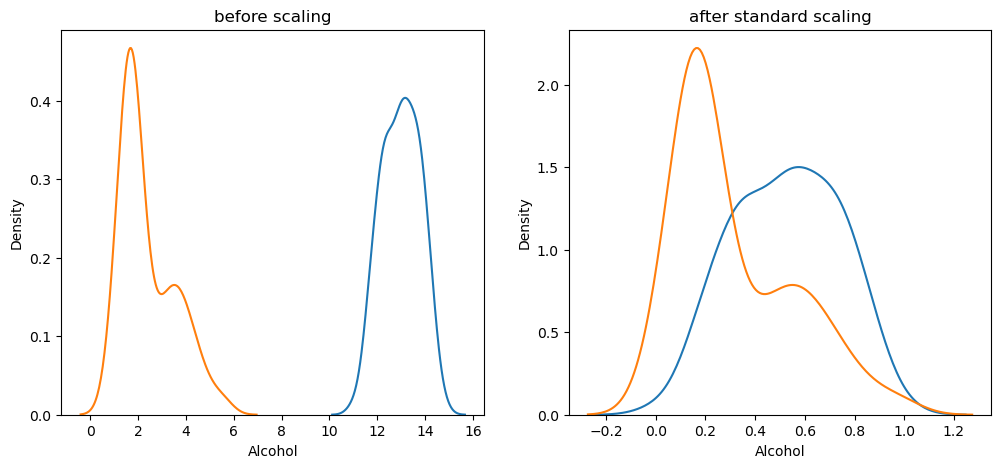

In [240]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("before scaling")
sns.kdeplot(x_train["Alcohol"],ax=ax1)
sns.kdeplot(x_train["Malic Acid"],ax=ax1)

ax2.set_title("after standard scaling")
sns.kdeplot(x_trainscaled_df["Alcohol"],ax=ax2)
sns.kdeplot(x_trainscaled_df["Malic Acid"],ax=ax2)